In [1]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import make_subplots
from Scripts.plotly_save import save_fig

In [2]:
main_dir = "/u/kaimibk/Documents/Research/NAC/"
data_dir = main_dir+"data/"
out_dir = main_dir+"output/"
fig_dir = out_dir+"figs/"

In [3]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)
df.head(4)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,k2_vmag,k2_e_vmag,k2_teff,k2_e_teff,band,Index,iso_rad_K2,iso_rad_err_K2,iso_teff_K2,iso_teff_err_K2
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1.0,2.73,-1.66,0.41,...,NaN,NaN,3959.0,348.0,kmag,0,0.419426,0.013360,4222.314643,100.0
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1.0,2.81,-2.23,0.19,...,NaN,NaN,3514.0,144.0,kmag,1,0.268599,0.009612,3951.132391,100.0
2,J03414895+2303235,55.453963,23.056539,13.19,6.09,0.239,1.0,2.86,-2.26,0.19,...,NaN,NaN,3687.0,169.0,kmag,2,0.269544,0.014740,3875.296173,100.0
3,J03415671+2358434,55.486317,23.978728,13.25,5.76,0.401,1.0,2.82,-2.27,0.18,...,NaN,NaN,3654.0,169.0,kmag,3,0.303899,0.012164,3788.293001,100.0


## Comparing Radii Measurements

In [4]:
par_radii = go.Parcoords(
            line = {'color' : 'blue'},
            dimensions = list([      
                dict(
                    range = [0,1.4],
                    label = 'Jackson et al. (2018)', 
                    values = df["R/Ro"]
                    ),
                dict(
                    range = [0,1.4],
                    label = "GAIA DR2",
                    values = df.radius_val
                    ),  
                dict(
                    range = [0,1.4],
                    label = "Isoclassify (2MASS)",
                    values = df.iso_rad
                    ), 
                dict(
                    #range = [0,1.4],
                    label = "K2",
                    values = df.K2_rad
                    ), 
                dict(
                    range = [0,1.4],
                    label = "Isoclassify (K2)",
                    values = df.iso_rad_K2
                    ),  
                 
        ])
    )

layout = go.Layout(title = "Radii Measurement Comparison")

figure = go.Figure(data=[par_radii], layout=layout)

save_fig(figure, 'radius_parcoords_k2', fig_dir, dynamic=True, scale=2)
# #py.iplot(figure, filename = 'radius_parcoords_k2')

## Comparing Teff Measurements

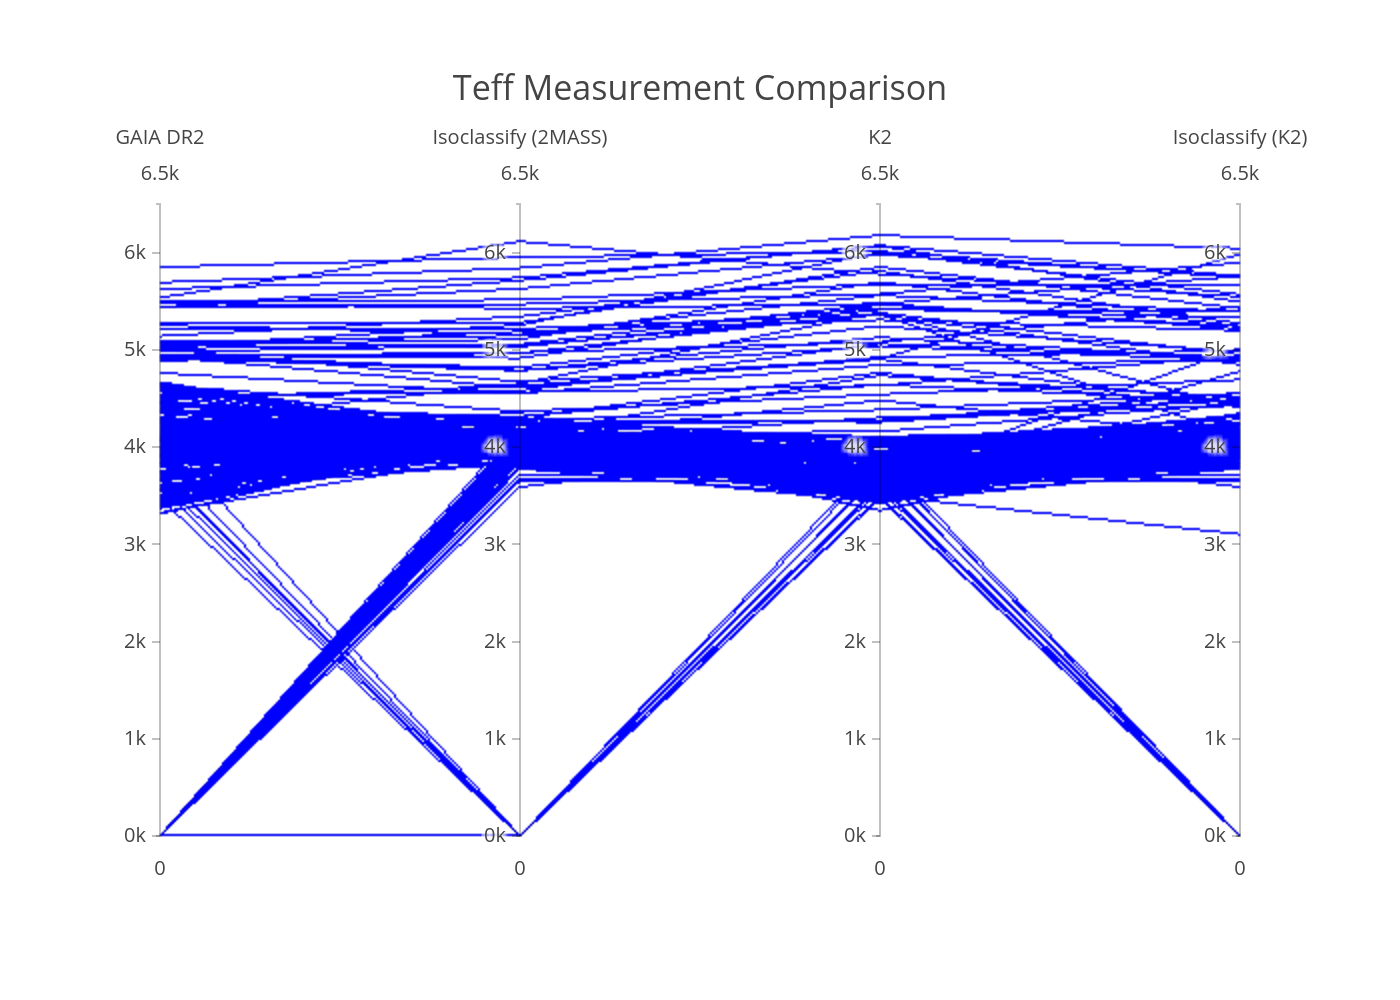

In [5]:
par_teff = go.Parcoords(
            line = {'color' : 'blue'},
            dimensions = list([      
                dict(
                    range = [0,6500],
                    label = "GAIA DR2",
                    values = df.teff_val
                    ),  
                dict(
                    range = [0,6500],
                    label = "Isoclassify (2MASS)",
                    values = df.iso_teff
                    ), 
                dict(
                    range = [0,6500],
                    label = "K2",
                    values = df.K2_teff
                    ), 
                dict(
                    range = [0,6500],
                    label = "Isoclassify (K2)",
                    values = df.iso_teff_K2
                    ),  
                 
        ])
    )

layout = go.Layout(title = "Teff Measurement Comparison")

figure = go.Figure(data=[par_teff], layout=layout)

save_fig(figure, 'Teff_parcoords_k2', fig_dir, dynamic=False, scale=2)

## Scatter Plots

### Radii and Teff

plot isoclassify(K2) vs isoclassify(2MASS), and K2 vs isoclassify(2MASS) as separate y vs x plots with the identity line, without zero values

In [6]:
## Radius Plots
trace1 = go.Scatter(
        mode = 'markers',
        x = df.iso_rad,
        error_x = {
            "type" : "data",
            "array" : df.iso_rad_Err,
            "visible" : True
            },
        y = df.iso_rad_K2,
        error_y = {
            "type" : "data",
            "array" : df.iso_rad_err_K2,
            "visible" : True
            },
        text = df.Name,
        hoverinfo = "text+x+y"
    )

trace2 = go.Scatter(
        mode = 'markers',
        x = df.iso_rad,
        error_x = {
            "type" : "data",
            "array" : df.iso_rad_Err,
            "visible" : True
            },
        y = df.K2_rad,
        error_y = {
            "type" : "data",
            "array" : df.K2_rad_err,
            "visible" : True
            },
        text = df.Name,
        hoverinfo = "text+x+y"
    )
## Teff Plots
trace3 = go.Scatter(
        mode = 'markers',
        x = df.iso_teff,
        error_x = {
            "type" : "data",
            "array" : df.iso_teff_Err,
            "visible" : True
            },
        y = df.iso_teff_K2,
        error_y = {
            "type" : "data",
            "array" : df.iso_teff_err_K2,
            "visible" : True
            },
        text = df.Name,
        hoverinfo = "text+x+y"
    )

trace4 = go.Scatter(
        mode = 'markers',
        x = df.iso_teff,
        error_x = {
            "type" : "data",
            "array" : df.iso_teff_Err,
            "visible" : True
            },
        y = df.K2_teff,
        error_y = {
            "type" : "data",
            "array" : df.K2_teff_err,
            "visible" : True
            },
        text = df.Name,
        hoverinfo = "text+x+y"
    )

In [7]:
fig = make_subplots(rows=2, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)


fig['layout'].update(showlegend=False)

fig['layout']['xaxis1'].update(title="Isoclassify(2MASS) Radii", 
                    mirror='ticks', linecolor='black', linewidth=1, range=[0.3, 1.4],
                    titlefont = {"size" : 12})
fig['layout']['xaxis2'].update(title='Isoclassify(2MASS) Radii', 
                    mirror='ticks', linecolor='black', linewidth=1, range=[0.1,1.4],
                    titlefont = {"size" : 12})
fig['layout']['xaxis3'].update(title="Isoclassify(2MASS) Teff", 
                    mirror='ticks', linecolor='black', linewidth=1, range=[3800,6200],
                    titlefont = {"size" : 12})
fig['layout']['xaxis4'].update(title='Isoclassify(2MASS) Teff', 
                    mirror='ticks', linecolor='black', linewidth=1, range=[3400, 6200],
                    titlefont = {"size" : 12})

fig['layout']['yaxis1'].update(title="Isoclassify(K2) Radii", 
                    mirror='ticks', linecolor='black', linewidth=1, range=[0.2, 1.3],
                    titlefont = {"size" : 12})
fig['layout']['yaxis2'].update(title='K2 Radii', mirror='ticks', 
                    linecolor='black', linewidth=1, range=[0.2, 11],
                    titlefont = {"size" : 12})
fig['layout']['yaxis3'].update(title="Isoclassify(K2) Teff", 
                    mirror='ticks', linecolor='black', linewidth=1, range=[2800, 6200],
                    titlefont = {"size" : 12})
fig['layout']['yaxis4'].update(title='K2 Teff', mirror='ticks', 
                    linecolor='black', linewidth=1, titlefont = {"size" : 12})

fig['layout']['shapes'] = (
    [
    {'type': 'line', 'x0': 0, 'y0': 0, 'x1': 1.7,'y1': 1.7, 
        'line': {'color': 'black','width': 3}, "xref":'x', "yref" : 'y'},
    {'type': 'line', 'x0': 0, 'y0': 0, 'x1': 1.7,'y1': 1.7, 
        'line': {'color': 'black','width': 3}, "xref" : 'x2', "yref" : 'y2'},
    {'type': 'line', 'x0': 2500, 'y0': 2500, 'x1': 6500,'y1': 6500, 
        'line': {'color': 'black','width': 3}, "xref" : 'x3', "yref" : 'y3'},
    {'type': 'line', 'x0': 2500, 'y0': 2500, 'x1': 6500,'y1': 6500, 
        'line': {'color': 'black','width': 3}, "xref" : 'x4', "yref" : 'y4'},
    ])

#py.iplot(fig, filename='radii_teff_scatter')
save_fig(fig, 'radii_teff_scatter', fig_dir, dynamic=True, scale=3)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



### Radii

In [8]:
trace1 = go.Scatter(
        mode = 'markers',
        x = df.radius_val,
        y = df.iso_rad_K2,
        marker = {"opacity" : 0.6},
        error_x = {
            "type" : "data",
            "array" : df.radius_sigma,
            "visible" : True
            },
        error_y = {
            "type" : "data",
            "array" : df.iso_rad_err_K2,
            "visible" : True
            }
    )

trace2 = go.Scatter(
        mode = 'markers',
        x = df["R/Ro"],
        y = df.iso_rad_K2,
        marker = {"opacity" : 0.6},
        error_y = {
            "type" : "data",
            "array" : df.iso_rad_err_K2,
            "visible" : True
            }
    )

fig = make_subplots(rows=1, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(showlegend=False)

fig['layout']['xaxis1'].update(title="GAIA Radii", 
                       mirror='ticks', linecolor='black', linewidth=1, range=[0.0, 1.5])
fig['layout']['xaxis2'].update(title='Jackson et al. (2018) Radii', 
                       mirror='ticks', linecolor='black', linewidth=1, range=[0.0, 1.5])

fig['layout']['yaxis1'].update(title="Isoclassify (K2) Radii", 
                       mirror='ticks', linecolor='black', linewidth=1, range=[0.0, 1.5])
fig['layout']['yaxis2'].update(title='Isoclassify (K2) Radii', mirror='ticks', 
                       linecolor='black', linewidth=1, range=[0.0, 1.5])
fig['layout']['shapes'] = (
    [
    {'type': 'line', 'x0': 0, 'y0': 0, 'x1': 1.7,'y1': 1.7, 
        'line': {'color': 'black','width': 3}, "xref":'x', "yref" : 'y'},
    {'type': 'line', 'x0': 0, 'y0': 0, 'x1': 1.7,'y1': 1.7, 
        'line': {'color': 'black','width': 3}, "xref" : 'x2', "yref" : 'y2'}
    ])

#py.iplot(fig, filename='comparing_radii_scatter')
save_fig(fig, 'comparing_radii_scatter', fig_dir, dynamic=True, scale=3)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

